# Klasyfikacja jakości wina na podstawie testów fizykochemicznych
### https://archive.ics.uci.edu/ml/datasets/wine+quality

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("winequality-red.csv", delimiter=';')

display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Anaconda3\envs\data_science\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238D7C61548>,
      dtype=object)

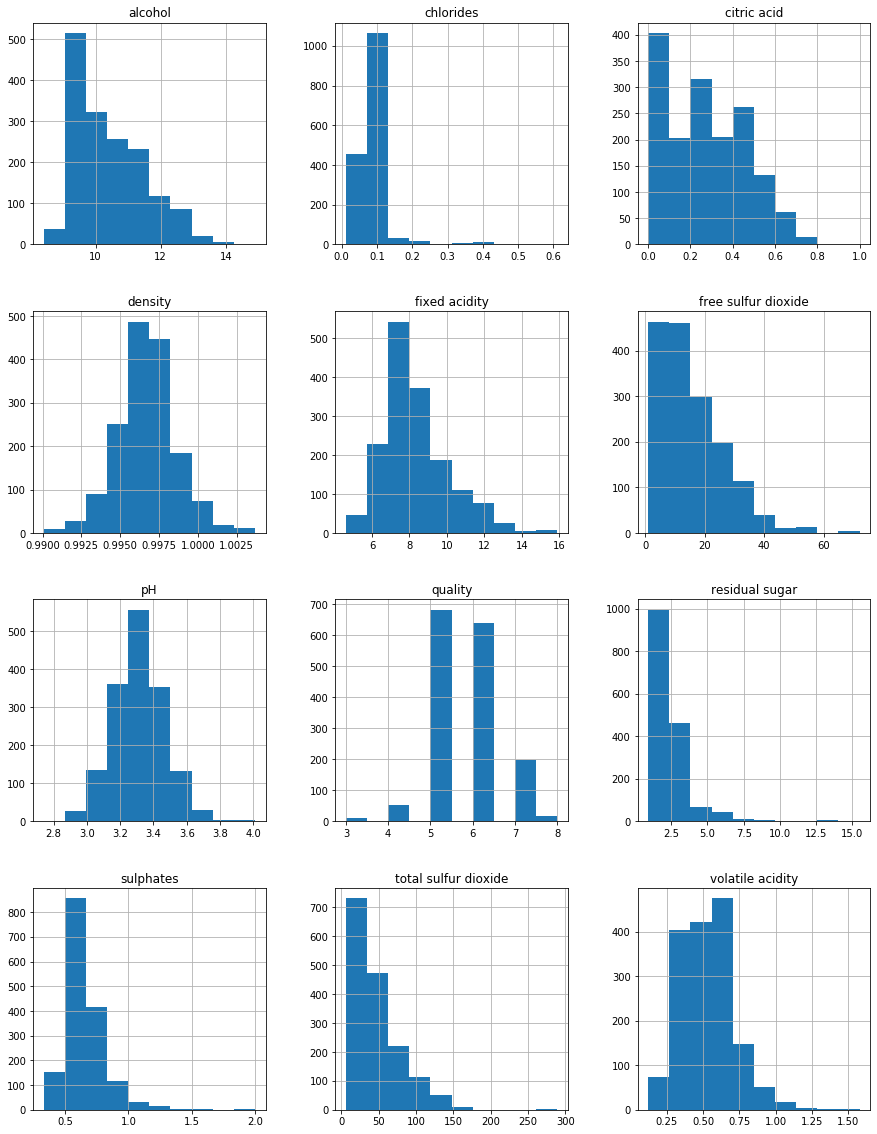

In [21]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax)

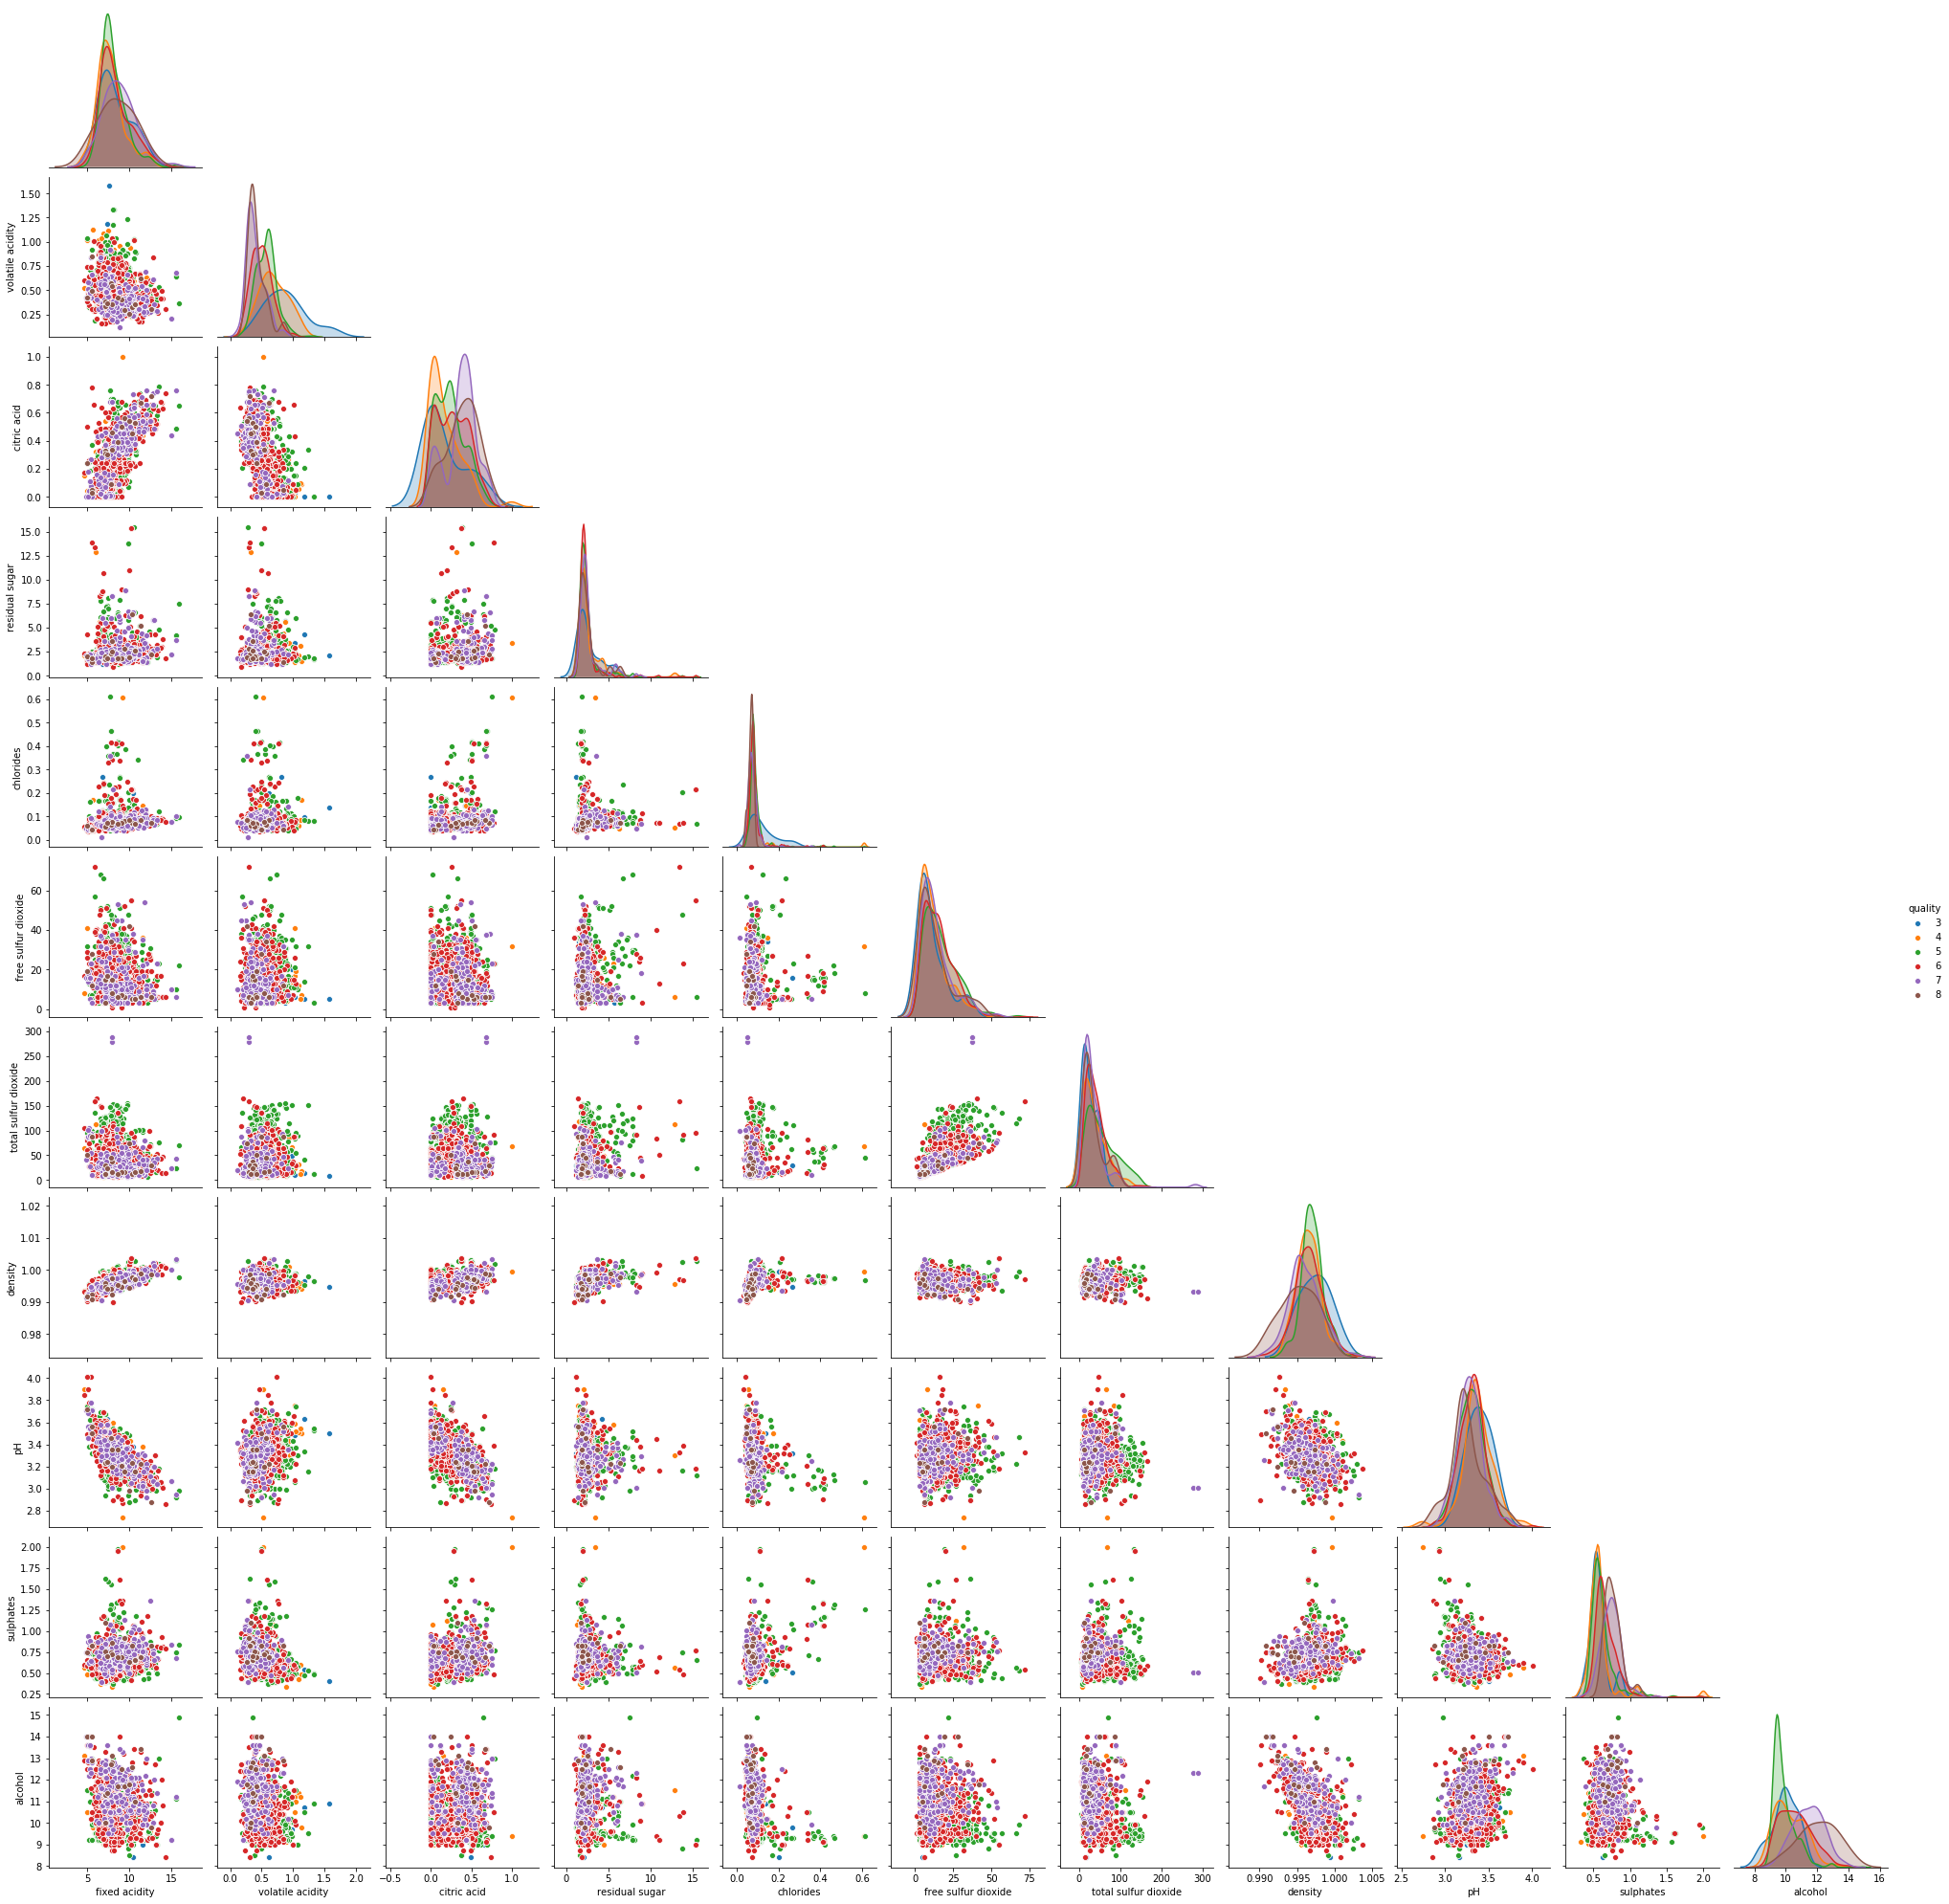

In [18]:
sns.pairplot(
    df.iloc[:, :],
    hue="quality",
    corner=True
)

In [29]:
y = df.pop('quality').values
X = df.to_numpy()

#### Liczebność klas

In [82]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
df_tmp = pd.DataFrame([[k,v] for k, v in zip(unique_elements, counts_elements)])
df_tmp = df_tmp.set_index(0)
display(df_tmp)

,1
0,
3,10
4,53
5,681
6,638
7,199
8,18


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

### Regresja logistyczna

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

#### Współczynnik $R^2$

Zbiór treningowy

In [40]:
reg.score(X_train, y_train)

0.35485287452056635

Zbiór testowy

In [41]:
reg.score(X_test, y_test)

0.37228312008181064

$y = b + a_1x_1 + a_2x_2 + ... $

In [42]:
display(reg.coef_)
display(reg.intercept_)

array([ 2.18600313e-02, -1.00869523e+00, -1.33904164e-01,  8.85944150e-03,
       -1.75557840e+00,  5.00853894e-03, -3.65426072e-03, -1.62236478e+01,
       -3.43939544e-01,  8.19819425e-01,  2.86228187e-01])

20.028917356887142

### Regresja Bayesowska

In [46]:
reg = BayesianRidge().fit(X_train, y_train)

#### Współczynnik $R^2$

Zbiór treningowy

In [47]:
reg.score(X_train, y_train)

0.35310060612590055

Zbiór testowy

In [48]:
reg.score(X_test, y_test)

0.3665011195723745

$y = b + a_1x_1 + a_2x_2 + ... $

In [49]:
display(reg.coef_)
display(reg.intercept_)

array([ 1.38579182e-02, -1.02598246e+00, -1.53516232e-01,  2.35390036e-04,
       -1.03607519e+00,  5.15799897e-03, -3.57325308e-03, -1.10857236e-02,
       -3.37203700e-01,  6.96471002e-01,  3.08705097e-01])

3.726953267082616

### Regresja logistyczna

In [57]:
scaler = preprocessing.StandardScaler().fit(X_train)

softmax_reg = LogisticRegression(multi_class="multinomial").fit(scaler.transform(X_train), y_train)

#### Skuteczność modelu

Zbiór treningowy

In [58]:
softmax_reg.score(scaler.transform(X_train), y_train)

0.6138448707256047

Zbiór testowy

In [61]:
softmax_reg.score(scaler.transform(X_test), y_test)

0.5875

### Macierz pomyłek

##### Zbiór treningowy

In [70]:
labels = [num for num in np.unique(y)]

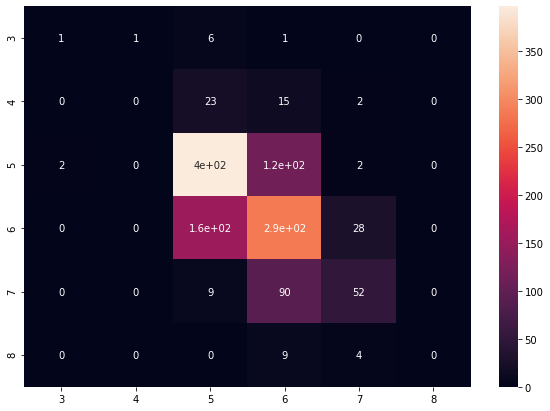

In [72]:
y_true = y_train
y_pred = softmax_reg.predict(scaler.transform(X_train))
cm = confusion_matrix(y_true, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels,
                  columns=labels)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

##### Zbiór testowy

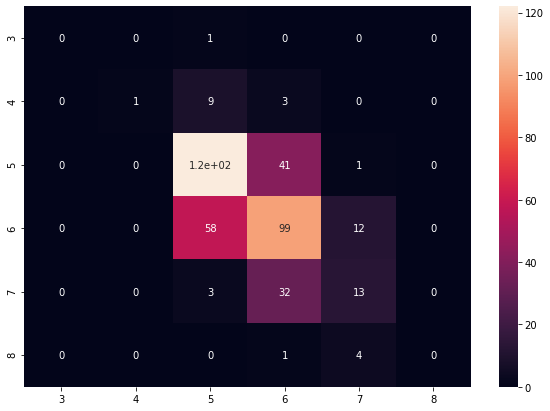

In [83]:
y_true = y_test
y_pred = softmax_reg.predict(scaler.transform(X_test))
cm = confusion_matrix(y_true, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels,
                  columns=labels)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)